In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris['data']
y = iris['target']

# X_train, X_test, y_train_y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, X, y, cv=5)

In [5]:
print( scores )
print( scores.mean() )

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


In [14]:
fold = KFold(n_splits=3)
fold2 = KFold(n_splits=3, shuffle=True, random_state=42)
fold3 = StratifiedKFold(n_splits=3)
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, X, y, cv=fold)
scores2 = cross_val_score(logreg, X, y, cv=fold2)
scores3 = cross_val_score(logreg, X, y, cv=fold3)

print( scores,  scores2, scores3 )

[0. 0. 0.] [1.   0.92 0.98] [0.98 0.96 0.98]


In [16]:
list( fold.split(iris['target']) )
list( fold2.split(iris['target']) )
list( fold3.split(iris['target'], iris['target']) )

[(array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
          30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  67,  68,  69,  70,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149]),
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  50,  51,  52,  53,  54,  55,  56,  57,  58,
          59,  60,  61,  62,  63,  64,  65,  66, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  34,  35,  36,  37,  38,  39,  40,

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.94666667 0.96       0.96       0.97333333 0.98666667 0.96
 0.98666667 0.98666667 0.94666667 1.        ]


In [22]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고, 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75       0.6        0.66666667]


In [24]:
list( GroupKFold(n_splits=3).split(X, y, groups) )

[(array([ 0,  1,  2,  7,  8,  9, 10, 11]), array([3, 4, 5, 6])),
 (array([0, 1, 2, 3, 4, 5, 6]), array([ 7,  8,  9, 10, 11])),
 (array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), array([0, 1, 2]))]

In [26]:
# 딕셔너리 형식의 매개변수 그리드 만들기
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }
print("매개변수 그리드:\n{}".format(param_grid))

# GridSearchCV 객체 만들기
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) # 훈련 / 검증 분할 + 테스트

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test))) # 최종 모델 검증


매개변수 그리드:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
테스트 세트 점수: 0.97


In [35]:
grid_search.best_estimator_
grid_search.best_params_
grid_search.best_score_
grid_search.cv_results_.keys()
grid_search.cv_results_['split0_test_score'].shape

(36,)

In [37]:
sfold = StratifiedKFold(n_splits=5)
splits = sfold.split(iris.data, iris.target)
list(splits)

[(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
          36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
         106, 107, 108, 109])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31, 

In [41]:
sfold = StratifiedKFold(n_splits=5)
splits = sfold.split(iris.data, iris.target)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

scores = []
best_score = -1
best_params = None
for train_idx_set, test_idx_set in splits:
    
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) # 훈련 / 검증 분할 + 검증
    grid_search.fit(iris.data[train_idx_set], iris.target[train_idx_set])
    # print(grid_search.best_score_) # 최적의 하이퍼파라미터를 사용한 테스트 값
    score = grid_search.score(iris.data[test_idx_set], iris.target[test_idx_set]) # w + parameter 테스트
    scores.append(score)
    if best_score < score:
        best_score = score
        best_params = grid_search.best_params_

In [43]:
scores, best_params

([0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0],
 {'C': 10, 'gamma': 0.01})

In [45]:
# best_svc = SVC(C=10, gamma=0.01) # 최적 파라미터로 모델 생성
best_svc = SVC(**best_params) # **{ 'C': 10, 'gamma': 0.01 } --> C=10, gamma=0.01
best_svc.fit(iris['data'], iris['target']) # 전체 데이터로 훈련

SVC(C=10, gamma=0.01)

In [74]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

gcv = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
gcv2 = GridSearchCV(gcv, param_grid={'cv':[5]}, cv=5)
gcv2.fit(iris['data'], iris['target'])
gcv2.best_estimator_.best_params_

# scores = cross_val_score(gcv, # train / val cross_val
#                          iris['data'], iris['target'], 
#                          cv=5) # train / test cross_validation





{'C': 1, 'gamma': 0.1}

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


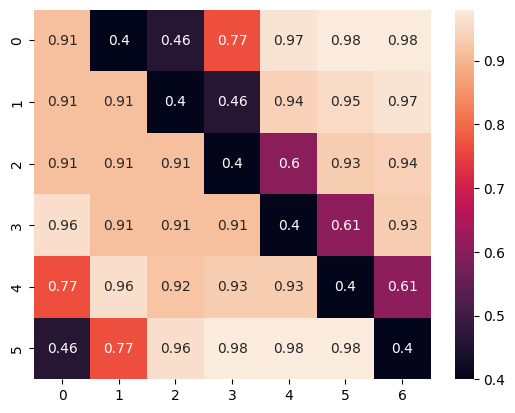

In [76]:
import seaborn as sns

be = gcv2.best_estimator_
be.best_score_
be.cv_results_['split0_test_score']

print( be.cv_results_.keys() )
# print(be.cv_results_["params"])
# print(be.cv_results_['mean_test_score'])
# be.cv_results_['mean_test_score'].reshape(6, 6) # x : gamma, y : C
scores_matrix = be.cv_results_['mean_test_score'].reshape(7, 6).T # x : C, y : gamma

sns.heatmap(scores_matrix, annot=True)
plt.show()